In [1]:
import pandas as pd

# kaggle survey data
raw_df = pd.read_csv('data/kaggle_survey_2017_2021.csv', header=[0,1], encoding='utf-8')
raw_df

C:\Users\user\AppData\Local\Temp\ipykernel_25984\1901305659.py:4: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,27

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# to avoid discriminating by age, gender and nationality, drop Q1, Q2, Q3
# to focus analysis on technology trends, further drop Q4, Q5, Q6 and duration
# in practice we may want to filter out invalid responses, e.g. response duration too short
raw_df.drop(['Q1', 'Q2', 'Q3', 'Q4','Q5','Q6','Time from Start to Finish (seconds)'], axis=1, inplace=True, level=0)

In [3]:
# print value counts for each non-numeric column
for col in raw_df.columns:
    if raw_df[col].dtype == 'object':
        print(raw_df[col].value_counts())
        print()


(Q7_Part_1, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python)
Python    65942
Name: count, dtype: int64

(Q7_Part_2, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R)
R    20884
Name: count, dtype: int64

(Q7_Part_3, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL)
SQL    33090
Name: count, dtype: int64

(Q7_Part_4, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C)
C    9696
Name: count, dtype: int64

(Q7_Part_5, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++)
C++    11618
Name: count, dtype: int64

(Q7_Part_6, What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java)
Java    14402
Name: count, dtype: int64

(Q7_Part_7, What programming languages do you u

In [4]:
# regex to extract Q1, Q20, etc
import re
def extract_question_number(col):
    result = re.search(r'^(Q\d+)', col)
    if result:
        return result.group(1)
    else:
        return col

# test
extract_question_number('Q27_A_Part_7')

'Q27'

In [5]:
# rename columns with question numbers
df = raw_df.copy()
for col in df.columns:
    print(col)
    # remove question parts
    raw_qn_num = col[0]
    qn_num = extract_question_number(raw_qn_num)
    split_qn = col[1].split(' - Selected Choice - ')
    question = split_qn[0].strip()
    df.rename(
        columns={raw_qn_num: f'{qn_num} - {question}'}, 
        inplace=True,
        level=0
        )
    if len(split_qn) == 1:
        df.rename(
            columns={col[1]: qn_num},
            inplace=True,
            level=1
        )
        continue
    df.rename(
        columns={col[1]: split_qn[1].strip()},
        inplace=True,
        level=1
    )
df

('-', 'Year')
('Q7_Part_1', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python')
('Q7_Part_2', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R')
('Q7_Part_3', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL')
('Q7_Part_4', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C')
('Q7_Part_5', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++')
('Q7_Part_6', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java')
('Q7_Part_7', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript')
('Q7_Part_8', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - J

- - Year  \
              -   
0          2021   
1          2021   
2          2021   
3          2021   
4          2021   
...         ...   
106296     2017   
106297     2017   
106298     2017   
106299     2017   
106300     2017   

       Q7 - What programming languages do you use on a regular basis? (Select all that apply)  \
                                                                                       Python   
0                                                  Python                                       
1                                                     NaN                                       
2                                                  Python                                       
3                                                  Python                                       
4                                                  Python                                       
...                                                   ...                                       
106296                                                NaN                                       
106297                                                NaN                                       
106298                                                NaN                                       
106299                                                NaN                                       
106300                                                NaN                                       

                                                         ...  \
          R  SQL    C  C++  Java Javascript Julia Swift  ...   
0         R  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
1       NaN  SQL    C  C++  Java        NaN   NaN   NaN  ...   
2       NaN  NaN  NaN  C++  Java        NaN   NaN   NaN  ...   
3       NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
4       NaN  NaN    C  NaN   NaN        NaN   NaN   NaN  ...   
...     ...  ...  ...  ...   ...        ...   ...   ...  ...   
106296  NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
106297  NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
106298  NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
106299  NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   
106300  NaN  NaN  NaN  NaN   NaN        NaN   NaN   NaN  ...   

       Q38 - In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)  \
                                                                                                                                        Neptune.ai   
0                                                     NaN                                                                                            
1                                                     NaN                                                                                            
2                                                     NaN                                                                                            
3                                                     NaN                                                                                            
4                                                     NaN                                                                                            
...                                                   ...                                                                                            
106296                                                NaN                                                                                            
106297                                                NaN                                                                                            
106298                                                NaN                                                                                            
106299        

In [6]:
# clean multi-part questions
for col in df.columns:
    print(col)
    is_multi_part = len(df[col[0]].columns) > 1
    if is_multi_part:
        # fill non-null values with default value
        df[col] = df[col].apply(lambda x: True if not pd.isnull(x) else False)
df

('- - Year', '-')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'Python')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'R')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'SQL')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'C')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'C++')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'Java')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'Javascript')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'Julia')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)', 'Swift')
('Q7 - What programming languages do you use on a regular basis? (Select all that apply)'

- - Year  \
              -   
0          2021   
1          2021   
2          2021   
3          2021   
4          2021   
...         ...   
106296     2017   
106297     2017   
106298     2017   
106299     2017   
106300     2017   

       Q7 - What programming languages do you use on a regular basis? (Select all that apply)  \
                                                                                       Python   
0                                                    True                                       
1                                                   False                                       
2                                                    True                                       
3                                                    True                                       
4                                                    True                                       
...                                                   ...                                       
106296                                              False                                       
106297                                              False                                       
106298                                              False                                       
106299                                              False                                       
106300                                              False                                       

                                                                    ...  \
            R    SQL      C    C++   Java Javascript  Julia  Swift  ...   
0        True  False  False  False  False      False  False  False  ...   
1       False   True   True   True   True      False  False  False  ...   
2       False  False  False   True   True      False  False  False  ...   
3       False  False  False  False  False      False  False  False  ...   
4       False  False   True  False  False      False  False  False  ...   
...       ...    ...    ...    ...    ...        ...    ...    ...  ...   
106296  False  False  False  False  False      False  False  False  ...   
106297  False  False  False  False  False      False  False  False  ...   
106298  False  False  False  False  False      False  False  False  ...   
106299  False  False  False  False  False      False  False  False  ...   
106300  False  False  False  False  False      False  False  False  ...   

       Q38 - In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)  \
                                                                                                                                        Neptune.ai   
0                                                   False                                                                                            
1                                                   False                                                                                            
2                                                   False                                                                                            
3                                                   False                                                                                            
4                                                   False                                                                                            
...                                                   ...                                                                                            
106296                                              False                                                                                            
106297                                              False                                                                                            
106298               

In [7]:
df.rename({'- - Year':'year'}, axis=1, inplace=True, level=0)

In [8]:
# print value counts for each non-numeric column
for col in df.columns:
    print(df[col].value_counts())
    print()


(year, -)
2021    25973
2018    23859
2020    20036
2019    19717
2017    16716
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), Python)
True     65942
False    40359
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), R)
False    85417
True     20884
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), SQL)
False    73211
True     33090
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), C)
False    96605
True      9696
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), C++)
False    94683
True     11618
Name: count, dtype: int64

(Q7 - What programming languages do you use on a regular basis? (Select all that apply), Java)
False    91899
True     14402
Name: count, d

In [9]:
# pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# pca on all numeric columns
numeric_df = df.select_dtypes(include='bool')
numeric_df

# pca
pca = PCA()
pca.fit(numeric_df.copy())
pca_df = pd.DataFrame(
    pca.transform(numeric_df.copy()),
    columns=[f'PC{i+1}' for i in range(len(numeric_df.columns))]
    )
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272
0,2.407110,-0.002202,0.867804,1.639918,-0.455486,-0.446902,0.852672,-0.240494,1.694802,-0.702382,...,1.630853e-16,-1.598095e-16,2.337397e-16,1.628973e-17,-1.971745e-16,-1.196923e-16,-1.037366e-17,-8.608755e-32,-2.474502e-32,3.811838e-16
1,0.316138,1.625072,-0.316697,0.125416,0.340599,-0.119091,-0.334332,-0.908308,-0.487694,0.643487,...,4.232163e-16,3.225145e-16,-2.196971e-17,-1.102109e-16,7.502863e-17,4.266840e-16,1.640507e-16,-1.098037e-30,1.121095e-31,-1.530134e-16
2,-0.013961,1.697945,-0.581500,0.230595,1.124392,-0.884462,-0.062933,-0.724507,0.717198,-0.361079,...,1.422339e-16,-6.964646e-17,1.005867e-16,-5.669887e-17,-1.784666e-17,-1.598936e-16,-5.610050e-17,-1.081397e-30,7.133311e-33,-5.187083e-17
3,0.977915,0.676895,1.512752,-0.791769,0.069646,0.856528,0.702630,0.550288,0.397351,-1.178370,...,-1.102535e-16,7.396106e-18,-4.734683e-17,2.389563e-17,9.387177e-17,7.410014e-18,-7.185241e-19,-7.570152e-31,4.315456e-33,-4.305014e-17
4,0.958040,-0.355761,0.195061,0.591411,-0.599222,-0.396903,-0.737824,-0.526559,0.135984,-0.677944,...,3.820278e-17,3.661032e-16,5.937563e-18,5.862439e-17,2.186873e-16,2.865435e-17,-1.148571e-16,-1.206443e-31,3.917702e-33,-1.410140e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,-1.783748,-0.006171,0.306411,0.060141,-0.067320,0.084377,-0.067297,0.135384,0.072750,0.115678,...,1.974229e-17,3.276137e-18,-8.315549e-18,1.452649e-18,5.462366e-17,6.217392e-18,6.762471e-18,-1.745806e-32,1.017301e-33,-3.391210e-18
106297,-1.783748,-0.006171,0.306411,0.060141,-0.067320,0.084377,-0.067297,0.135384,0.072750,0.115678,...,1.974229e-17,3.276137e-18,-8.315549e-18,1.452649e-18,5.462366e-17,6.217392e-18,6.762471e-18,-1.745806e-32,1.017301e-33,-3.391210e-18
106298,-1.783748,-0.006171,0.306411,0.060141,-0.067320,0.084377,-0.067297,0.135384,0.072750,0.115678,...,1.974229e-17,3.276137e-18,-8.315549e-18,1.452649e-18,5.462366e-17,6.217392e-18,6.762471e-18,-1.745806e-32,1.017301e-33,-3.391210e-18
106299,-1.783748,-0.006171,0.306411,0.060141,-0.067320,0.084377,-0.067297,0.135384,0.072750,0.115678,...,1.974229e-17,3.276137e-18,-8.315549e-18,1.452649e-18,5.462366e-17,6.217392e-18,6.762471e-18,-1.745806e-32,1.017301e-33,-3.391210e-18


<BarContainer object of 10 artists>

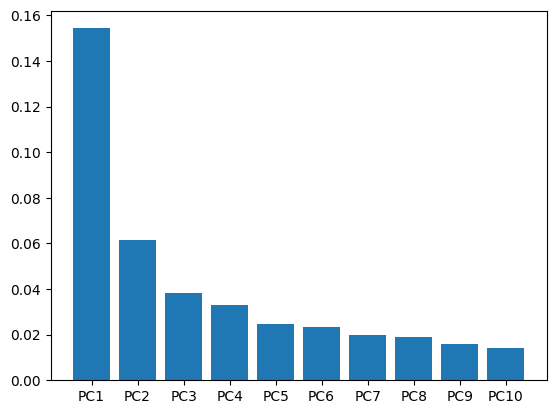

In [10]:
# plot explained variance
plt.bar(
    x=[f'PC{i+1}' for i in range(10)],
    height=pca.explained_variance_ratio_[:10]
    )

In [11]:
# pca components
pca_component_df = pd.DataFrame(
    pca.components_,
    columns=numeric_df.columns,
    index=[f'PC{i+1}' for i in range(len(numeric_df.columns))]
    )
pca_component_df

Q7 - What programming languages do you use on a regular basis? (Select all that apply)  \
                                                                                      Python   
PC1                                             0.242625                                       
PC2                                            -0.005058                                       
PC3                                            -0.094375                                       
PC4                                            -0.190559                                       
PC5                                            -0.025232                                       
...                                                  ...                                       
PC268                                          -0.000000                                       
PC269                                          -0.000000                                       
PC270                                          -0.000000                                       
PC271                                           0.000000                                       
PC272                                           0.000000                                       

                                                                             \
                  R           SQL             C           C++          Java   
PC1    7.586887e-02  1.371724e-01  3.475948e-02  4.580111e-02  4.745304e-02   
PC2   -8.712320e-02 -6.967856e-02  5.605950e-02  6.328772e-02 -3.305972e-04   
PC3   -2.320635e-01 -1.821815e-01  3.914348e-02  6.629328e-02 -2.953986e-02   
PC4    1.685176e-01  9.492287e-02 -3.566368e-02 -4.821011e-02 -7.950935e-02   
PC5   -1.860973e-01  1.110281e-01  7.451832e-02  8.798073e-02  1.592270e-01   
...             ...           ...           ...           ...           ...   
PC268 -1.962738e-17 -1.079695e-17 -7.447687e-18  1.862206e-17 -1.817245e-17   
PC269 -1.374461e-17 -1.061791e-17  3.981075e-18  4.170108e-18  2.761777e-17   
PC270  2.279035e-31  9.918063e-33  3.258868e-31 -3.072001e-31  4.770119e-31   
PC271 -3.460679e-34 -1.625068e-33  7.969592e-33  1.437309e-33  3.212837e-34   
PC272 -8.761878e-17  2.201059e-17 -1.173239e-16  8.745806e-17  7.269500e-17   

                                                               ...  \
         Javascript         Julia         Swift          Bash  ...   
PC1    4.917678e-02  4.537200e-03  2.259595e-03  4.828339e-02  ...   
PC2   -1.166804e-02 -2.283849e-03  7.752419e-04 -4.718725e-02  ...   
PC3   -2.379719e-02 -1.488547e-03  2.305338e-03 -1.311343e-02  ...   
PC4   -4.159226e-02 -1.153207e-04  8.927894e-04 -1.366761e-02  ...   
PC5    1.813019e-01  4.579339e-03  6.944437e-03  6.192404e-02  ...   
...             ...           ...           ...           ...  ...   
PC268  1.336091e-18  1.314113e-16 -4.145189e-17  5.997718e-17  ...   
PC269 -7.619759e-18  8.447188e-17 -5.477772e-17  3.244673e-17  ...   
PC270  2.496305e-31 -2.291665e-31  2.508475e-30 -7.045217e-31  ...   
PC271 -7.694518e-33 -2.218857e-32 -1.419316e-33  7.001831e-33  ...   
PC272 -5.832556e-17 -3.511097e-16 -8.353901e-18 -3.369471e-17  ...   

      Q38 - In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)  \
                                                                                                                                       Neptune.ai   
PC1                                         1.112884e-02                                                                                            
PC2                                         5.933833e-02                                                                                            
PC3                                        -2.683597e-02                                                                                            
PC4                                         7.378453e-03                 

In [12]:
# Python EDA and ML tools
print(pca_component_df.loc['PC1'].sort_values(ascending=False)[:5])

Q14 - What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)         Matplotlib                       0.249187
Q16 - Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)  Scikit-learn                     0.249151
Q7 - What programming languages do you use on a regular basis? (Select all that apply)                           Python                           0.242625
Q14 - What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)         Seaborn                          0.207618
Q17 - Which of the following ML algorithms do you use on a regular basis? (Select all that apply):               Linear or Logistic Regression    0.203261
Name: PC1, dtype: float64


In [13]:
# Desire to learn GCP/AWS/Azure and other enterprise tools
print(pca_component_df.loc['PC2'].sort_values(ascending=False)[:5])

Q27 - Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?                                                                                  Google Cloud Platform (GCP)    0.235277
                                                                                                                                                                                                      Amazon Web Services (AWS)      0.233643
Q32 - Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)  MySQL                          0.199710
Q34 - Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)                                                        Tableau                        0.185619
Q27 - Which of the following cloud computing pla

In [14]:
# Deep Learning Usage
print(pca_component_df.loc['PC3'].sort_values(ascending=False)[:5])

Q17 - Which of the following ML algorithms do you use on a regular basis? (Select all that apply):         Convolutional Neural Networks                                                                                           0.261721
Q12 - Which types of specialized hardware do you use on a regular basis?  (Select all that apply)          NVIDIA GPUs                                                                                                             0.217967
Q18 - Which categories of computer vision methods do you use on a regular basis?  (Select all that apply)  Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)    0.195308
Q17 - Which of the following ML algorithms do you use on a regular basis? (Select all that apply):         Recurrent Neural Networks                                                                                               0.166393
                                                        

In [15]:
# Data Science Interest on Blogs and Youtube
print(pca_component_df.loc['PC4'].sort_values(ascending=False)[:5])

Q24 - Select any activities that make up an important part of your role at work: (Select all that apply)                      Analyze and understand data to influence product or business decisions    0.218978
Q42 - Who/what are your favorite media sources that report on data science topics? (Select all that apply)                    Blogs (Towards Data Science, Analytics Vidhya, etc)                       0.212694
                                                                                                                              YouTube (Kaggle YouTube, Cloud AI Adventures, etc)                        0.191115
Q38 - Do you use any tools to help manage machine learning experiments? (Select all that apply)                               No / None                                                                 0.187295
Q36 - Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)  No / None                             

In [16]:
# IDE: VScode
print(pca_component_df.loc['PC5'].sort_values(ascending=False)[:5])

Q9 - Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)                                        Visual Studio / Visual Studio Code    0.258934
Q7 - What programming languages do you use on a regular basis? (Select all that apply)                                                                                 Javascript                            0.181302
Q27 - Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)                                                          Amazon Web Services (AWS)             0.171805
Q32 - Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)  MySQL                                 0.167062
Q7 - What programming languages do you use on a regular basis? (Select all that apply)                                                          

In [21]:
# R usage
print(pca_component_df.loc['PC6'].sort_values(ascending=False)[:5])

Q7 - What programming languages do you use on a regular basis? (Select all that apply)                                           R                                0.311141
Q9 - Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)  RStudio                          0.305015
Q14 - What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)                         Ggplot / ggplot2                 0.274328
Q17 - Which of the following ML algorithms do you use on a regular basis? (Select all that apply):                               Convolutional Neural Networks    0.177216
                                                                                                                                 Recurrent Neural Networks        0.149572
Name: PC6, dtype: float64


In [22]:
# Data Science online learning
print(pca_component_df.loc['PC7'].sort_values(ascending=False)[:5])

Q42 - Who/what are your favorite media sources that report on data science topics? (Select all that apply)  Kaggle (notebooks, forums, etc)                       0.293548
Q40 - On which platforms have you begun or completed data science courses? (Select all that apply)          Coursera                                              0.256071
Q42 - Who/what are your favorite media sources that report on data science topics? (Select all that apply)  YouTube (Kaggle YouTube, Cloud AI Adventures, etc)    0.209120
Q40 - On which platforms have you begun or completed data science courses? (Select all that apply)          Kaggle Learn Courses                                  0.208813
Q12 - Which types of specialized hardware do you use on a regular basis?  (Select all that apply)           CPUs                                                  0.191432
Name: PC7, dtype: float64


In [29]:
top_trends = {
    'PC1': 'Python EDA tools',
    'PC2': 'Desire to learn GCP/AWS/Azure and other enterprise tools',
    'PC3': 'Deep Learning Usage',
    'PC4': 'Data Science Interest on Blogs and Youtube',
    'PC5': 'IDE: VScode usage',
    'PC6': 'R usage',
    'PC7': 'Data Science online learning'
}
trends_df = pca_df[top_trends.keys()].merge(df['year'], left_index=True, right_index=True).rename({'-':'year'},axis=1)
trends_df = trends_df.groupby('year').agg('mean')
trends_df.rename(top_trends, axis=1, inplace=True)
trends_df

,Python EDA tools,Desire to learn GCP/AWS/Azure and other enterprise tools,Deep Learning Usage,Data Science Interest on Blogs and Youtube,IDE: VScode usage,R usage,Data Science online learning
year,,,,,,,
2017,-1.783748,-0.006171,0.306411,0.060141,-0.067320,0.084377,-0.067297
2018,-0.171868,-0.709159,-0.595749,-0.452160,0.093774,0.063558,-0.008497
2019,0.360756,-0.196215,0.282713,0.175541,-0.350132,0.006236,0.424804
2020,0.519704,0.382563,0.088472,0.108706,0.016747,-0.026303,-0.126690
2021,0.631114,0.509249,0.067190,0.159535,0.210063,-0.097133,-0.173636


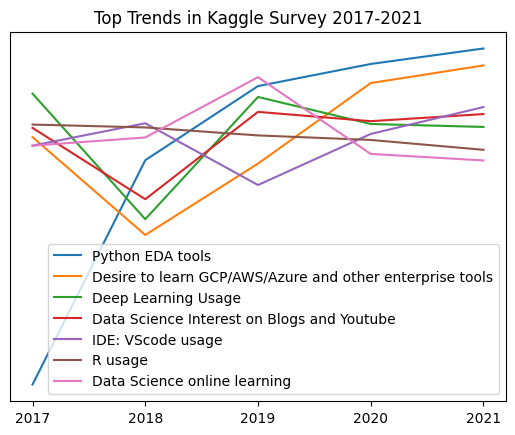

In [30]:
# plot trends: top trends in Kaggle survey 2017-2021
for _, trend in top_trends.items():
    if trend == 'year':
        continue
    plt.plot(
        [str(year) for year in trends_df.index],
        trends_df[trend],
        label=trend
        )
plt.title('Top Trends in Kaggle Survey 2017-2021')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()